In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet

df = pd.read_csv('../data/divvy_daily.csv')

In [2]:
print(df.groupby('weather')['weather'].count())

weather
clear             41
cloudy          1346
not clear          2
rain or snow      69
Name: weather, dtype: int64


In [3]:
df['date'] = pd.to_datetime(df['date'])
df.columns = ['ds', 'y', 'temp', 'weather']
df = pd.get_dummies(df, columns=['weather'], prefix='', prefix_sep='')

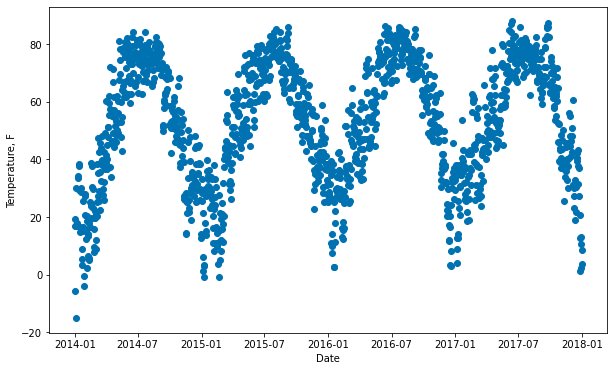

In [4]:
plt.figure(figsize=(10, 6))
plt.scatter(pd.to_datetime(df['ds']), df['temp'], c='#0072B2')
plt.xlabel('Date')
plt.ylabel('Temperature, F')
plt.show()

In [5]:
df.head()

,ds,y,temp,clear,cloudy,not clear,rain or snow
0,2014-01-01,95,19.483158,0,0,0,1
1,2014-01-02,111,16.833333,0,0,0,1
2,2014-01-03,6,-5.633333,1,0,0,0
3,2014-01-04,181,30.007735,0,0,0,1
4,2014-01-05,32,16.756250,0,0,0,1


In [6]:
model = Prophet(seasonality_mode='multiplicative',
                yearly_seasonality=4)
model.add_regressor(name='clear',
                    prior_scale=10,
                    standardize='auto',
                    mode='multiplicative')
model.add_regressor('not clear')
model.add_regressor('rain or snow')

In [7]:
from datetime import timedelta

# Remove final 2 weeks of training data
train = df[df['ds'] < df['ds'].max() - timedelta(weeks=2)]

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


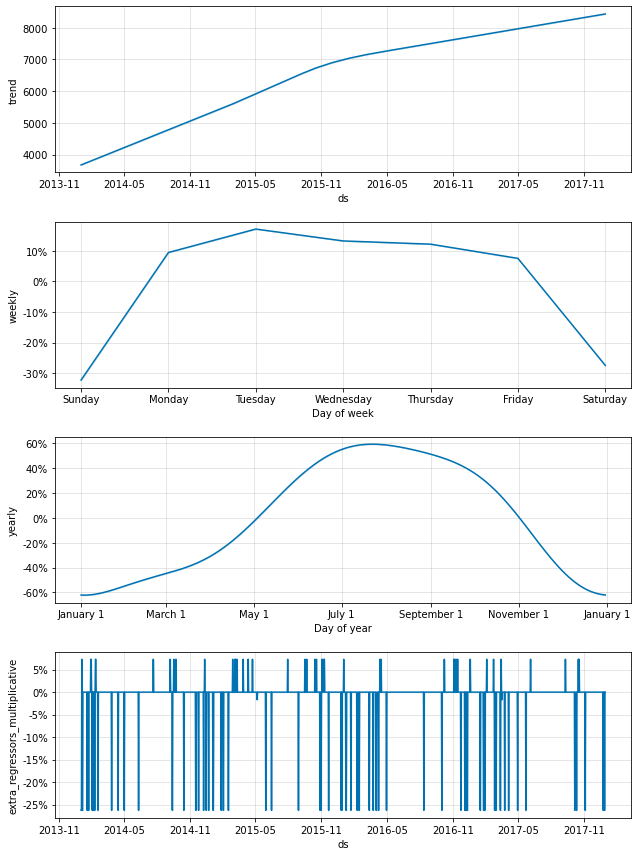

In [8]:
model.fit(train)

future = model.make_future_dataframe(periods=14)
future['clear'] = df['clear']
future['not clear'] = df['not clear']
future['rain or snow'] = df['rain or snow']
forecast = model.predict(future)

fig2 = model.plot_components(forecast)
plt.show()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


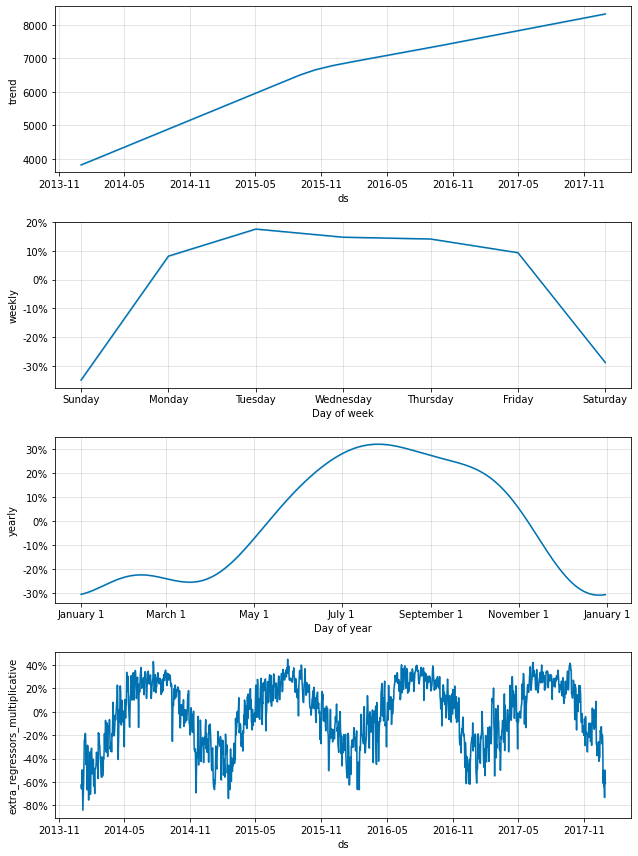

In [9]:
model = Prophet(seasonality_mode='multiplicative',
                yearly_seasonality=4)
model.add_regressor('temp')
model.add_regressor('clear')
model.add_regressor('not clear')
model.add_regressor('rain or snow')

model.fit(train)

future = model.make_future_dataframe(periods=14)
future['temp'] = df['temp']
future['clear'] = df['clear']
future['not clear'] = df['not clear']
future['rain or snow'] = df['rain or snow']
forecast = model.predict(future)

fig2 = model.plot_components(forecast)
plt.show() 

In [10]:
from fbprophet.utilities import regressor_coefficients

In [11]:
regressor_coefficients(model)

,regressor,regressor_mode,center,coef_lower,coef,coef_upper
0,temp,multiplicative,53.423706,0.012290,0.012290,0.012290
1,clear,multiplicative,0.000000,0.109500,0.109500,0.109500
2,not clear,multiplicative,0.000000,-0.031381,-0.031381,-0.031381
3,rain or snow,multiplicative,0.000000,-0.207697,-0.207697,-0.207697


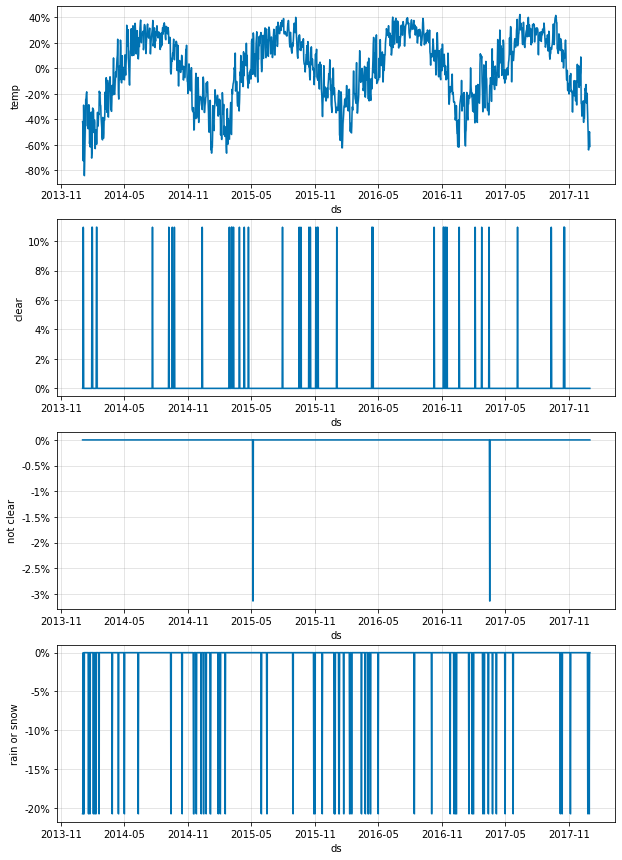

In [12]:
from fbprophet.plot import plot_forecast_component

fig, axes = plt.subplots(len(regressor_coefficients(model)),
                         figsize=(10, 15))
for i, regressor in enumerate(
    regressor_coefficients(model)['regressor']):
    plot_forecast_component(model,
                            forecast,
                            regressor,
                            axes[i])
plt.show()